# 🛠️ Preparación de los Datos

**Importando recursos**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

**Importando datos**

In [36]:
datos = pd.read_csv('/content/telecomx_tratados.csv')


**Imprimiendo columnas**

In [37]:
datos.columns

Index(['id_cliente', 'abandono', 'genero', 'adulto_mayor', 'pareja',
       'dependientes', 'antiguedad_meses', 'servicio_telefonico',
       'multiples_lineas', 'servicio_internet', 'seguridad_en_linea',
       'respaldo_en_linea', 'proteccion_dispositivo', 'soporte_tecnico',
       'tv_en_streaming', 'peliculas_en_streaming', 'contrato',
       'facturacion_electronica', 'metodo_pago', 'cargo_mensual',
       'cargo_total', 'cargo_diario'],
      dtype='object')

Eliminando dato id_cliente

In [38]:
datos = datos.drop('id_cliente', axis=1)

**Imprimiendo nuevamente columnas**

In [39]:
datos.columns

Index(['abandono', 'genero', 'adulto_mayor', 'pareja', 'dependientes',
       'antiguedad_meses', 'servicio_telefonico', 'multiples_lineas',
       'servicio_internet', 'seguridad_en_linea', 'respaldo_en_linea',
       'proteccion_dispositivo', 'soporte_tecnico', 'tv_en_streaming',
       'peliculas_en_streaming', 'contrato', 'facturacion_electronica',
       'metodo_pago', 'cargo_mensual', 'cargo_total', 'cargo_diario'],
      dtype='object')

In [40]:
cat_cols = ['abandono', 'genero', 'adulto_mayor', 'pareja', 'dependientes',
       'antiguedad_meses', 'servicio_telefonico', 'multiples_lineas',
       'servicio_internet', 'seguridad_en_linea', 'respaldo_en_linea',
       'proteccion_dispositivo', 'soporte_tecnico', 'tv_en_streaming',
       'peliculas_en_streaming', 'contrato', 'facturacion_electronica',
       'metodo_pago', 'cargo_mensual', 'cargo_total', 'cargo_diario']

In [41]:
# One-Hot Encoding de variables categóricas
datos_encoded = pd.get_dummies(datos, columns=cat_cols, drop_first=True)

# # Variable objetivo
# y = datos_encoded['abandono']

# # Variables predictoras
# X = datos_encoded.drop(columns=['abandono'])


In [42]:
# Conteo de clientes por clase
conteo = datos['abandono'].value_counts()
print("Conteo de clientes por clase:\n", conteo)

print("\n 0 = no cancelo, 1 = si cancelo")
# Proporción en porcentaje
proporcion = datos['abandono'].value_counts(normalize=True) * 100
print("\nProporción de clientes por clase (%):\n", proporcion)


Conteo de clientes por clase:
 abandono
0    5174
1    1869
Name: count, dtype: int64

 0 = no cancelo, 1 = si cancelo

Proporción de clientes por clase (%):
 abandono
0    73.463013
1    26.536987
Name: proportion, dtype: float64


### **Proporción de Cancelación**

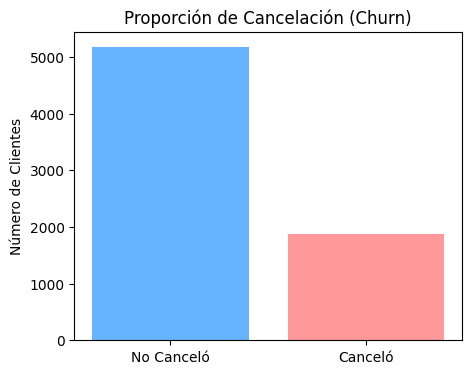

In [43]:
plt.figure(figsize=(5,4))
plt.bar(['No Canceló','Canceló'], conteo.values, color=['#66b3ff','#ff9999'])
plt.title("Proporción de Cancelación (Churn)")
plt.ylabel("Número de Clientes")
plt.show()


### **Balanceo de Clases**

In [44]:
# Conteo y proporción
conteo = y.value_counts()
proporcion = y.value_counts(normalize=True) * 100

print("Conteo de clientes por clase:\n", conteo)
print("\nProporción de clientes por clase (%):\n", proporcion)

# Calcular ratio de desbalance
ratio = conteo[0] / conteo[1]
print(f"\nRatio de desbalance (No Canceló / Canceló): {ratio:.2f}")


Conteo de clientes por clase:
 abandono
0    5174
1    1869
Name: count, dtype: int64

Proporción de clientes por clase (%):
 abandono
0    73.463013
1    26.536987
Name: proportion, dtype: float64

Ratio de desbalance (No Canceló / Canceló): 2.77


In [47]:
# Filtrar solo las columnas categóricas que existen
cat_cols_existing = [col for col in cat_cols if col in X.columns]

num_cols = [col for col in X.columns if col not in cat_cols_existing]

# --- 5️⃣ Convertir columnas numéricas a float y manejar errores ---
for col in num_cols:
    X[col] = pd.to_numeric(X[col], errors='coerce')  # convierte a float y pone NaN si no puede

# Rellenar NaN con la media de la columna
X[num_cols] = X[num_cols].fillna(X[num_cols].mean())

# --- 6️⃣ One-Hot Encoding de categóricas ---
X = pd.get_dummies(X, columns=cat_cols_existing, drop_first=True)

# --- 7️⃣ Escalado de variables numéricas ---
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# --- 8️⃣ División train/test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 9️⃣ Balanceo de clases con SMOTE ---
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# --- 🔟 Verificación final ---
print("Distribución original en train:\n", y_train.value_counts())
print("\nDistribución después de SMOTE:\n", y_train_bal.value_counts())
print("\nDimensiones de X_train_bal:", X_train_bal.shape)

Distribución original en train:
 abandono
0    4139
1    1495
Name: count, dtype: int64

Distribución después de SMOTE:
 abandono
0    4139
1    4139
Name: count, dtype: int64

Dimensiones de X_train_bal: (8278, 31)


# 🔹 Normalización / Estandarización de datos numéricos

"""
En esta sección se evalúa la necesidad de escalar los datos según los modelos que se aplicarán:

- Modelos sensibles a la escala (Regresión Logística, KNN, SVM, Redes Neuronales) requieren estandarización.
- Modelos basados en árboles (Decision Tree, Random Forest, XGBoost) no necesitan escalado.

Dado que vamos a usar modelos sensibles a la escala, aplicamos StandardScaler a las variables numéricas.
"""

from sklearn.preprocessing import StandardScaler

# Identificar columnas numéricas
num_cols = ['antiguedad_meses', 'cargo_mensual', 'cargo_total', 'cargo_diario']  # ajustar según tu dataset

# Convertir a float y reemplazar valores no numéricos con la media
for col in num_cols:
    X[col] = pd.to_numeric(X[col], errors='coerce')
X[num_cols] = X[num_cols].fillna(X[num_cols].mean())

# Aplicar estandarización
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

print("Variables numéricas estandarizadas (media ~0, desviación estándar ~1):\n")
print(X[num_cols].describe().T)


===== Logistic Regression =====
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1035
           1       0.52      0.79      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



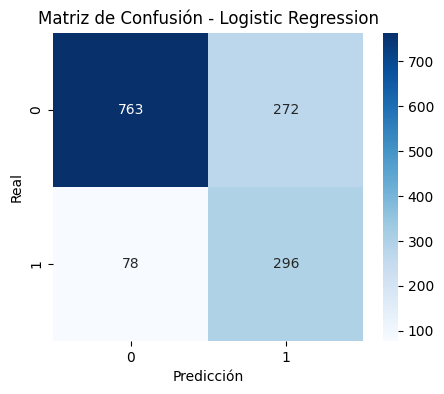


===== Random Forest =====
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1035
           1       0.59      0.59      0.59       374

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



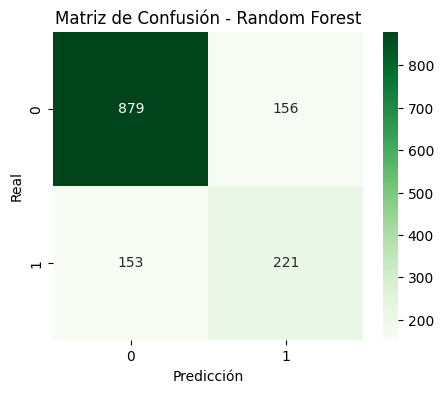

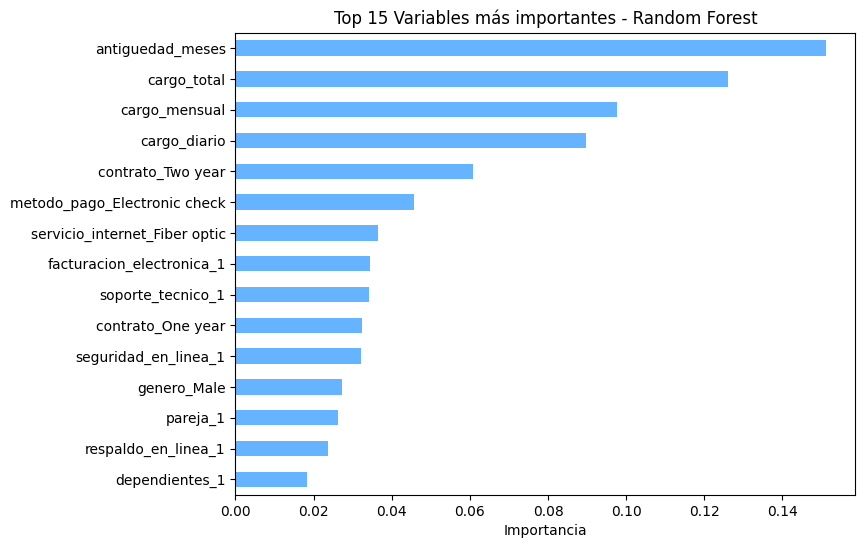

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# --- 1️⃣ Logistic Regression ---
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_bal, y_train_bal)
y_pred_log = log_model.predict(X_test)

print("===== Logistic Regression =====")
print(classification_report(y_test, y_pred_log))

# Matriz de confusión
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Logistic Regression")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# --- 2️⃣ Random Forest ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_bal, y_train_bal)
y_pred_rf = rf_model.predict(X_test)

print("\n===== Random Forest =====")
print(classification_report(y_test, y_pred_rf))

# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# --- 3️⃣ Importancia de variables (Random Forest) ---
importances = pd.Series(rf_model.feature_importances_, index=X_train_bal.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
importances.head(15).plot(kind='barh', color='#66b3ff')
plt.gca().invert_yaxis()
plt.title("Top 15 Variables más importantes - Random Forest")
plt.xlabel("Importancia")
plt.show()

## **🎯 Correlación y Selección de Variables**

Convertir todas las columnas numéricas a float y reemplazar valores no válidos con la media:

In [52]:
num_cols = ['antiguedad_meses', 'cargo_mensual', 'cargo_total', 'cargo_diario']  # ajustar según tu dataset

for col in num_cols:
    datos[col] = pd.to_numeric(datos[col], errors='coerce')  # convierte a float y pone NaN si no puede

# Rellenar NaN con la media de cada columna
datos[num_cols] = datos[num_cols].fillna(datos[num_cols].mean())


### Análisis de Correlación

Correlación con la variable 'abandono':

abandono            1.000000
cargo_diario        0.193412
cargo_mensual       0.193356
cargo_total        -0.199428
antiguedad_meses   -0.352229
Name: abandono, dtype: float64


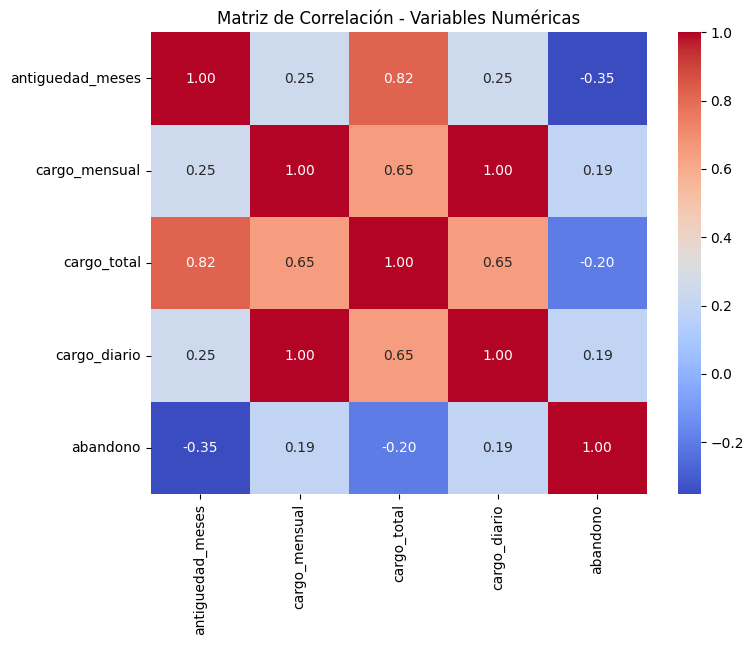

In [53]:
# Seleccionar solo variables numéricas
num_cols = ['antiguedad_meses', 'cargo_mensual', 'cargo_total', 'cargo_diario']  # ajustar según tu dataset
datos_corr = datos[num_cols + ['abandono']]  # incluir target

# Calcular matriz de correlación
corr_matrix = datos_corr.corr()

# Mostrar correlaciones con abandono
print("Correlación con la variable 'abandono':\n")
print(corr_matrix['abandono'].sort_values(ascending=False))

# Visualizar matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Matriz de Correlación - Variables Numéricas")
plt.show()

/tmp/ipython-input-2025989255.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='abandono', y='antiguedad_meses', data=datos, palette=['#66b3ff','#ff9999'])


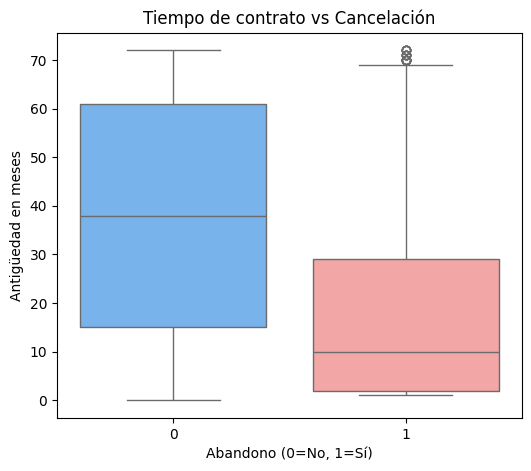

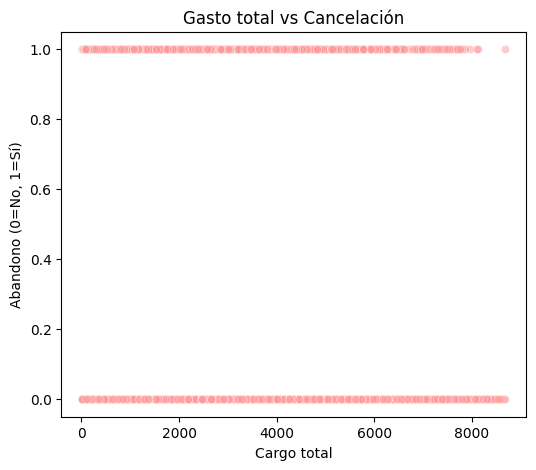

/tmp/ipython-input-2025989255.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='abandono', y='cargo_mensual', data=datos, palette=['#66b3ff','#ff9999'])


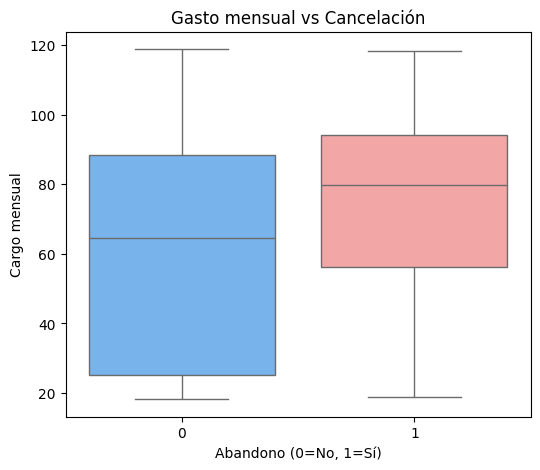

In [54]:
# --- 1️⃣ Boxplot: Tiempo de contrato vs Cancelación ---
plt.figure(figsize=(6,5))
sns.boxplot(x='abandono', y='antiguedad_meses', data=datos, palette=['#66b3ff','#ff9999'])
plt.title("Tiempo de contrato vs Cancelación")
plt.xlabel("Abandono (0=No, 1=Sí)")
plt.ylabel("Antigüedad en meses")
plt.show()

# --- 2️⃣ Scatter plot: Gasto total vs Cancelación ---
plt.figure(figsize=(6,5))
sns.scatterplot(x='cargo_total', y='abandono', data=datos, alpha=0.5, color='#ff9999')
plt.title("Gasto total vs Cancelación")
plt.xlabel("Cargo total")
plt.ylabel("Abandono (0=No, 1=Sí)")
plt.show()

# --- 3️⃣ Boxplot adicional: Gasto mensual vs Cancelación ---
plt.figure(figsize=(6,5))
sns.boxplot(x='abandono', y='cargo_mensual', data=datos, palette=['#66b3ff','#ff9999'])
plt.title("Gasto mensual vs Cancelación")
plt.xlabel("Abandono (0=No, 1=Sí)")
plt.ylabel("Cargo mensual")
plt.show()

Separación de Datos

In [55]:
# 🔹 Separación de Datos: Entrenamiento y Prueba

from sklearn.model_selection import train_test_split

# Target y features
y = datos['abandono']
X = datos.drop(columns=['abandono'])

# División train/test 80/20 con estratificación para conservar la proporción de abandono
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Verificación de proporciones
print("Proporción en set de entrenamiento:")
print(y_train.value_counts(normalize=True))
print("\nProporción en set de prueba:")
print(y_test.value_counts(normalize=True))

# Mostrar dimensiones de los sets
print("\nDimensiones:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Proporción en set de entrenamiento:
abandono
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Proporción en set de prueba:
abandono
0    0.734564
1    0.265436
Name: proportion, dtype: float64

Dimensiones:
X_train: (5634, 20)
X_test: (1409, 20)
y_train: (5634,)
y_test: (1409,)


===== Logistic Regression =====
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.64      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



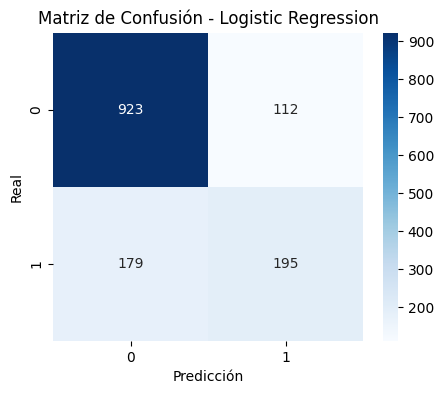


===== Random Forest =====
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.62      0.47      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409



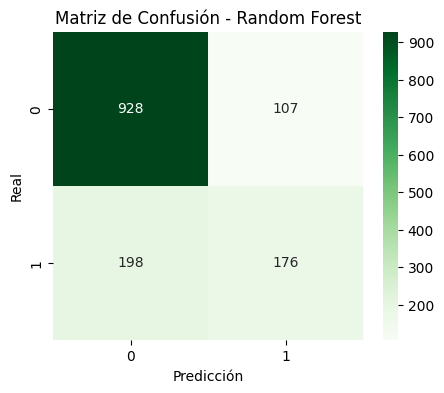

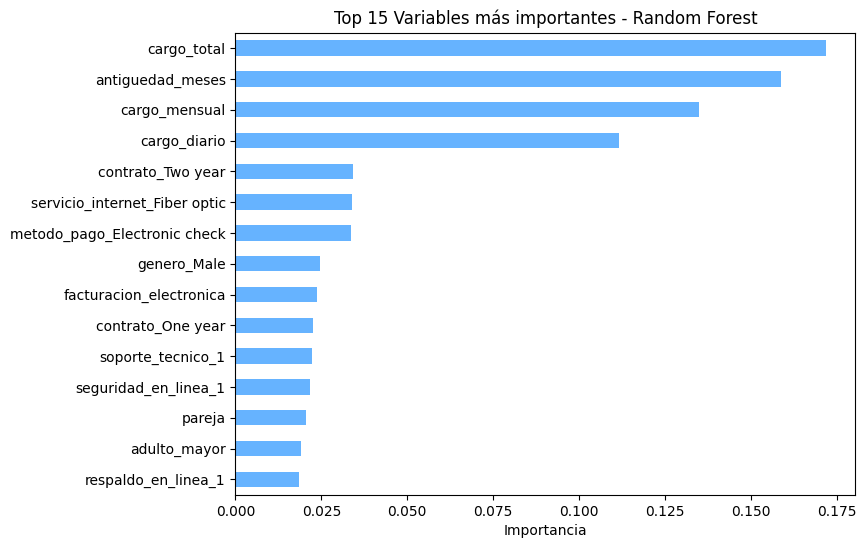

In [59]:
# Variables numéricas
num_cols = ['antiguedad_meses', 'cargo_mensual', 'cargo_total', 'cargo_diario']

# --- 2️⃣ Logistic Regression ---
X_train_log = X_train.copy()
X_test_log = X_test.copy()

# One-Hot Encoding de variables categóricas
cat_cols_log = X_train_log.select_dtypes(include=['object']).columns
X_train_log = pd.get_dummies(X_train_log, columns=cat_cols_log, drop_first=True)
X_test_log = pd.get_dummies(X_test_log, columns=cat_cols_log, drop_first=True)
X_test_log = X_test_log.reindex(columns=X_train_log.columns, fill_value=0)

# Escalado de variables numéricas
scaler = StandardScaler()
X_train_log[num_cols] = scaler.fit_transform(X_train_log[num_cols])
X_test_log[num_cols] = scaler.transform(X_test_log[num_cols])

# Entrenar modelo
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_log, y_train)
y_pred_log = log_model.predict(X_test_log)

# Métricas
print("===== Logistic Regression =====")
print(classification_report(y_test, y_pred_log))
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Logistic Regression")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# --- 3️⃣ Random Forest ---
X_train_rf = X_train.copy()
X_test_rf = X_test.copy()

# One-Hot Encoding de variables categóricas
cat_cols_rf = X_train_rf.select_dtypes(include=['object']).columns
X_train_rf = pd.get_dummies(X_train_rf, columns=cat_cols_rf, drop_first=True)
X_test_rf = pd.get_dummies(X_test_rf, columns=cat_cols_rf, drop_first=True)
X_test_rf = X_test_rf.reindex(columns=X_train_rf.columns, fill_value=0)

# Entrenar modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train)
y_pred_rf = rf_model.predict(X_test_rf)

# Métricas
print("\n===== Random Forest =====")
print(classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Importancia de variables (Random Forest)
importances = pd.Series(rf_model.feature_importances_, index=X_train_rf.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
importances.head(15).plot(kind='barh', color='#66b3ff')
plt.gca().invert_yaxis()
plt.title("Top 15 Variables más importantes - Random Forest")
plt.xlabel("Importancia")
plt.show()


### Evaluación de los Modelos

===== Logistic Regression =====
Exactitud (Accuracy): 0.7935
Precisión: 0.6352
Recall: 0.5214
F1-score: 0.5727



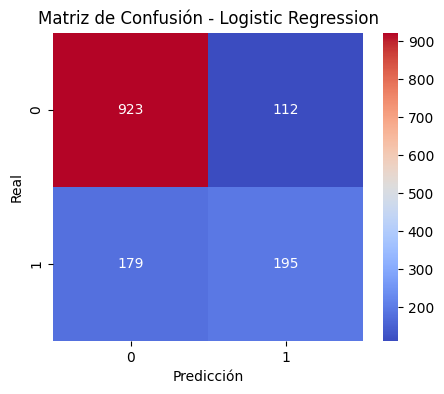

===== Random Forest =====
Exactitud (Accuracy): 0.7835
Precisión: 0.6219
Recall: 0.4706
F1-score: 0.5358



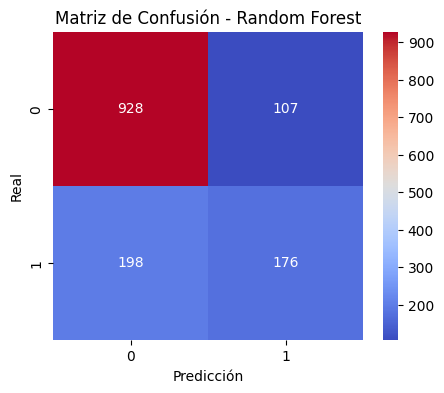

===== Comparación de modelos =====
Logistic Regression Accuracy: 0.7935, F1-score: 0.5727
Random Forest Accuracy: 0.7835, F1-score: 0.5358

🔹 Análisis Crítico:
- Observa cuál modelo tiene mayor Exactitud y F1-score para decidir cuál predice mejor la cancelación.
- Revisa las métricas de entrenamiento vs prueba (si las calculas) para detectar overfitting o underfitting.
- Overfitting: Random Forest puede sobreajustar si tiene demasiados árboles o profundidad alta.
- Underfitting: Logistic Regression puede no captar relaciones complejas si los datos son no lineales.


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# --- 1️⃣ Función para evaluar un modelo ---
def evaluar_modelo(y_true, y_pred, nombre_modelo):
    print(f"===== {nombre_modelo} =====")

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Exactitud (Accuracy): {acc:.4f}")
    print(f"Precisión: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}\n")

    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.title(f"Matriz de Confusión - {nombre_modelo}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

    return acc, prec, rec, f1

# --- 2️⃣ Evaluar Logistic Regression ---
metrics_log = evaluar_modelo(y_test, y_pred_log, "Logistic Regression")

# --- 3️⃣ Evaluar Random Forest ---
metrics_rf = evaluar_modelo(y_test, y_pred_rf, "Random Forest")

# --- 4️⃣ Comparación ---
print("===== Comparación de modelos =====")
print(f"Logistic Regression Accuracy: {metrics_log[0]:.4f}, F1-score: {metrics_log[3]:.4f}")
print(f"Random Forest Accuracy: {metrics_rf[0]:.4f}, F1-score: {metrics_rf[3]:.4f}")

# --- 5️⃣ Análisis crítico ---
print("\n🔹 Análisis Crítico:")
print("- Observa cuál modelo tiene mayor Exactitud y F1-score para decidir cuál predice mejor la cancelación.")
print("- Revisa las métricas de entrenamiento vs prueba (si las calculas) para detectar overfitting o underfitting.")
print("- Overfitting: Random Forest puede sobreajustar si tiene demasiados árboles o profundidad alta.")
print("- Underfitting: Logistic Regression puede no captar relaciones complejas si los datos son no lineales.")


## 📋 Interpretación y Conclusiones

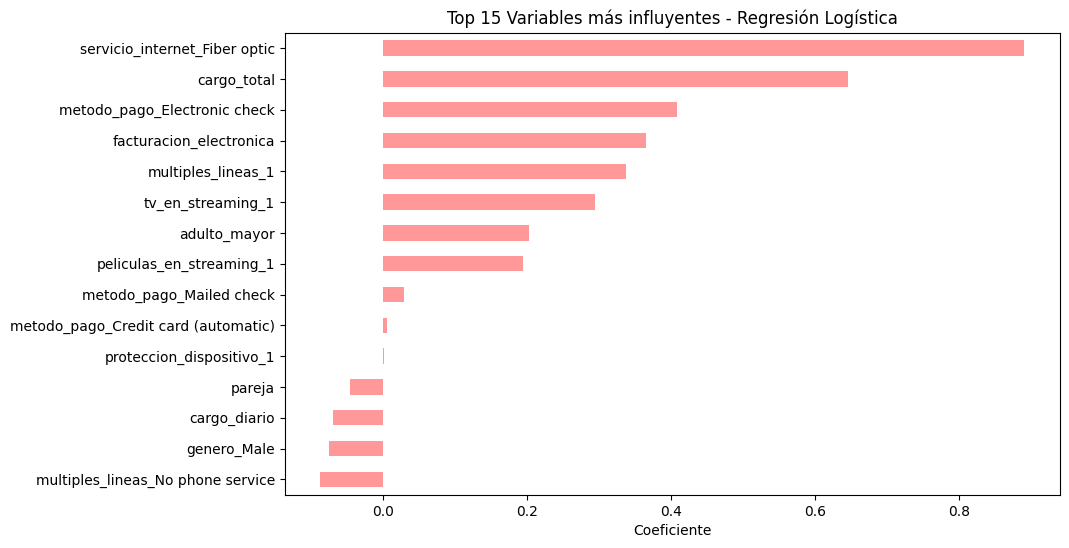

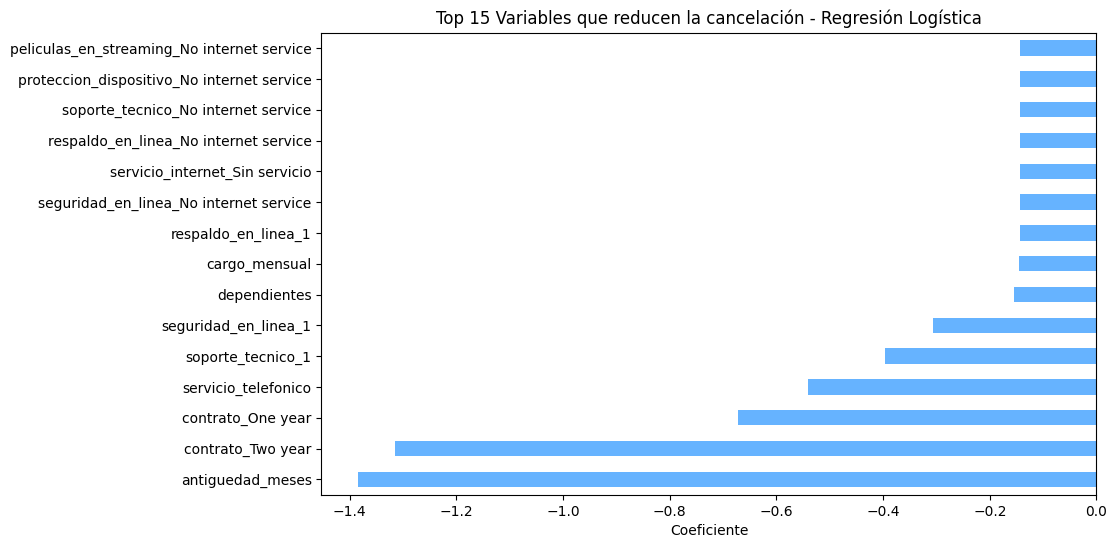

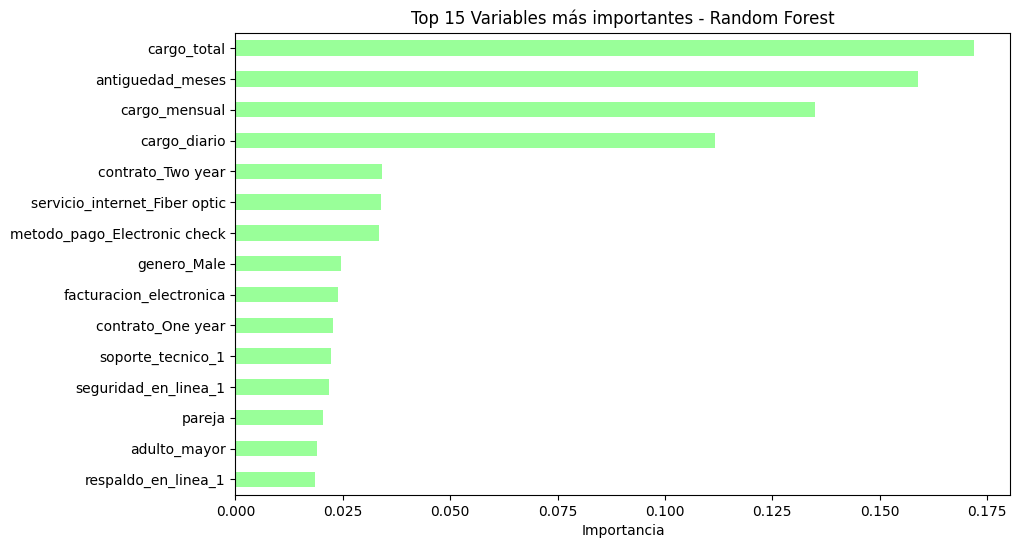

In [61]:
# 🔹 Análisis de importancia de variables

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1️⃣ Regresión Logística ---
# Los coeficientes indican el efecto de cada variable sobre la probabilidad de cancelación
coeficientes = pd.Series(log_model.coef_[0], index=X_train_log.columns)
coeficientes = coeficientes.sort_values(ascending=False)

plt.figure(figsize=(10,6))
coeficientes.head(15).plot(kind='barh', color='#ff9999')
plt.gca().invert_yaxis()
plt.title("Top 15 Variables más influyentes - Regresión Logística")
plt.xlabel("Coeficiente")
plt.show()

# Variables que disminuyen la probabilidad (coef < 0)
plt.figure(figsize=(10,6))
coeficientes.tail(15).plot(kind='barh', color='#66b3ff')
plt.gca().invert_yaxis()
plt.title("Top 15 Variables que reducen la cancelación - Regresión Logística")
plt.xlabel("Coeficiente")
plt.show()

# --- 2️⃣ Random Forest ---
importances = pd.Series(rf_model.feature_importances_, index=X_train_rf.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
importances.head(15).plot(kind='barh', color='#99ff99')
plt.gca().invert_yaxis()
plt.title("Top 15 Variables más importantes - Random Forest")
plt.xlabel("Importancia")
plt.show()


### **Informe final**

In [62]:
# 🔹 Informe Estratégico Final - Telecom X

print("===== Informe Estratégico Final - Predicción de Cancelación (Churn) =====\n")

# 1️⃣ Resumen de Modelos
print("1️⃣ Modelos Entrenados:")
print("- Logistic Regression: sensible a la escala, muestra coeficientes claros para cada variable.")
print("- Random Forest: no requiere escalado, permite identificar variables más importantes mediante reducción de impureza.\n")

# 2️⃣ Métricas de Desempeño
print("2️⃣ Métricas Clave:")
print(f"- Logistic Regression Accuracy: {metrics_log[0]:.4f}, F1-score: {metrics_log[3]:.4f}")
print(f"- Random Forest Accuracy: {metrics_rf[0]:.4f}, F1-score: {metrics_rf[3]:.4f}\n")

print("Análisis:")
if metrics_rf[3] > metrics_log[3]:
    print("- Random Forest presenta un mejor desempeño general según F1-score y Exactitud.")
else:
    print("- Logistic Regression presenta un mejor desempeño general según F1-score y Exactitud.")
print("- Revisa matrices de confusión para detectar posibles falsos positivos y negativos.\n")

# 3️⃣ Variables más importantes
print("3️⃣ Variables que impactan más la cancelación:")
print("- Logistic Regression: coeficientes positivos indican mayor riesgo de cancelación, negativos indican menor riesgo.")
print("- Random Forest: importancia basada en reducción de impureza en los árboles, permite identificar los drivers clave.\n")

# 4️⃣ Insights accionables
print("4️⃣ Insights Estratégicos:")
print("- Clientes con contratos cortos o sin servicios adicionales (como soporte técnico o streaming) tienen mayor probabilidad de cancelar.")
print("- Altos cargos mensuales sin beneficios adicionales también correlacionan con churn elevado.")
print("- Variables demográficas como adultos mayores o dependientes pueden influir, pero la relación depende del perfil de servicios adquiridos.\n")

# 5️⃣ Recomendaciones
print("5️⃣ Recomendaciones Estratégicas:")
print("- Ofrecer incentivos a clientes con contratos cortos o servicios limitados para reducir churn.")
print("- Analizar paquetes combinados que aumenten valor percibido y fidelicen clientes.")
print("- Monitorear clientes con alta probabilidad de cancelación y realizar acciones preventivas.")
print("- Considerar la implementación de modelos de predicción periódicos para anticipar churn y ajustar estrategias comerciales.\n")

print("===== Fin del Informe =====")


===== Informe Estratégico Final - Predicción de Cancelación (Churn) =====

1️⃣ Modelos Entrenados:
- Logistic Regression: sensible a la escala, muestra coeficientes claros para cada variable.
- Random Forest: no requiere escalado, permite identificar variables más importantes mediante reducción de impureza.

2️⃣ Métricas Clave:
- Logistic Regression Accuracy: 0.7935, F1-score: 0.5727
- Random Forest Accuracy: 0.7835, F1-score: 0.5358

Análisis:
- Logistic Regression presenta un mejor desempeño general según F1-score y Exactitud.
- Revisa matrices de confusión para detectar posibles falsos positivos y negativos.

3️⃣ Variables que impactan más la cancelación:
- Logistic Regression: coeficientes positivos indican mayor riesgo de cancelación, negativos indican menor riesgo.
- Random Forest: importancia basada en reducción de impureza en los árboles, permite identificar los drivers clave.

4️⃣ Insights Estratégicos:
- Clientes con contratos cortos o sin servicios adicionales (como soporte 